In [1]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.test.is_gpu_available()

In [ ]:
tf.config.list_physical_devices('GPU')

In [2]:
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2, validation_split=0.2)

In [3]:
batchsize =8

In [4]:
train_data= train_datagen.flow_from_directory(r'D:\driver drowsiness-deep\mrlEyes_2018_01\Prepared_Data\train',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical',subset='training' )
validation_data= train_datagen.flow_from_directory(r'D:\driver drowsiness-deep\mrlEyes_2018_01\Prepared_Data\train',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical', subset='validation')

Found 63882 images belonging to 2 classes.
Found 15969 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(r'D:\driver drowsiness-deep\mrlEyes_2018_01\Prepared_Data\test',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical')

Found 5047 images belonging to 2 classes.


In [6]:
bmodel = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(80,80,3)))
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation= 'softmax')(hmodel)

model = Model(inputs=bmodel.input, outputs= hmodel)
for layer in bmodel.layers:
    layer.trainable = False

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 39, 39, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 39, 39, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 39, 39, 32)   0           ['batch_normalization[0][0]']

In [ ]:
model.summary()

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

In [19]:
checkpoint = ModelCheckpoint(r'D:\driver drowsiness-deep\models\model.h5',
                            monitor='val_loss',save_best_only=True,verbose=3)

earlystop = EarlyStopping(monitor = 'val_loss', patience=7, verbose= 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=3, verbose= 3, )

callbacks=[checkpoint,earlystop,learning_rate]

In [13]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(train_data,steps_per_epoch=train_data.samples//batchsize,
                   validation_data=validation_data,
                   validation_steps=validation_data.samples//batchsize,
                   callbacks=callbacks,
                    epochs=30)

Epoch 1/30
7985/7985 [==============================] - ETA: 0s - loss: 0.1591 - accuracy: 0.9411
Epoch 1: val_loss did not improve from 0.17670
7985/7985 [==============================] - 907s 112ms/step - loss: 0.1591 - accuracy: 0.9411 - val_loss: 0.2227 - val_accuracy: 0.9156 - lr: 0.0010
Epoch 2/30
7985/7985 [==============================] - ETA: 0s - loss: 0.1560 - accuracy: 0.9413
Epoch 2: val_loss did not improve from 0.17670
7985/7985 [==============================] - 861s 108ms/step - loss: 0.1560 - accuracy: 0.9413 - val_loss: 0.1781 - val_accuracy: 0.9255 - lr: 0.0010
Epoch 3/30
7985/7985 [==============================] - ETA: 0s - loss: 0.1539 - accuracy: 0.9422
Epoch 3: val_loss did not improve from 0.17670
7985/7985 [==============================] - 837s 105ms/step - loss: 0.1539 - accuracy: 0.9422 - val_loss: 0.2208 - val_accuracy: 0.9083 - lr: 0.0010
Epoch 4/30
7985/7985 [==============================] - ETA: 0s - loss: 0.1554 - accuracy: 0.9404
Epoch 4: val_loss

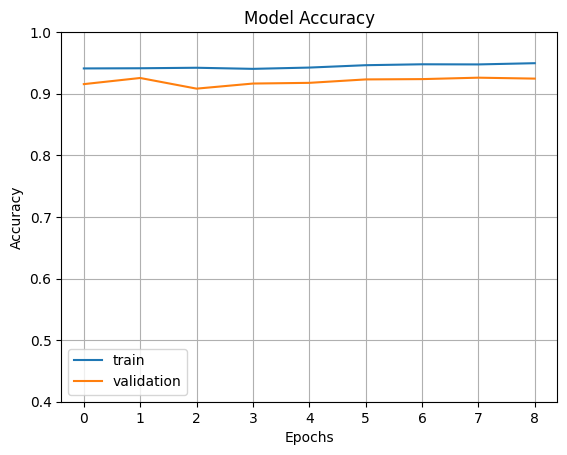

In [15]:
import matplotlib.pyplot as plt
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [16]:
acc_tr, loss_tr = model.evaluate(train_data)
print(acc_tr)
print(loss_tr)

7986/7986 [==============================] - 687s 86ms/step - loss: 0.1324 - accuracy: 0.9490
0.13238905370235443
0.9489684104919434


In [17]:
acc_vr, loss_vr = model.evaluate(validation_data)
print(acc_vr)
print(loss_vr)

1997/1997 [==============================] - 163s 81ms/step - loss: 0.1732 - accuracy: 0.9271
0.173186257481575
0.9271087646484375


In [18]:
acc_test, loss_test = model.evaluate(test_data)
print(acc_tr)
print(loss_tr)

631/631 [==============================] - 54s 84ms/step - loss: 0.4211 - accuracy: 0.8458
0.13238905370235443
0.9489684104919434
